10.138.120.66:3128_1mb  download    0.084878
10.138.3.162:3128_1mb   download    0.088144
10.138.57.2:3128_1mb    download    0.085367
10.139.40.122:3128_1mb  download    0.012711
10.139.40.85:3128_1mb   download    0.086722
dtype: float64


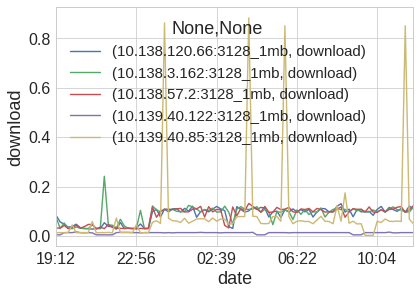

10.138.120.66:3128_10mb  download    0.168222
10.138.3.162:3128_10mb   download    0.161267
10.138.57.2:3128_10mb    download    0.168256
10.139.40.122:3128_10mb  download    0.100122
10.139.40.85:3128_10mb   download    0.110089
dtype: float64


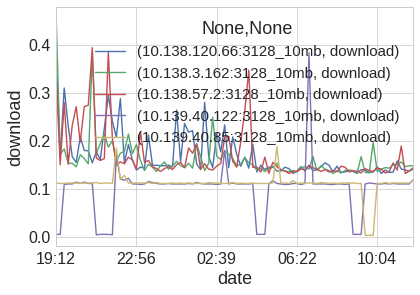

10.138.120.66:3128_100mb  download    1.752033
10.138.3.162:3128_100mb   download    1.978500
10.138.57.2:3128_100mb    download    1.747922
10.139.40.122:3128_100mb  download    1.136578
10.139.40.85:3128_100mb   download    1.296800
dtype: float64


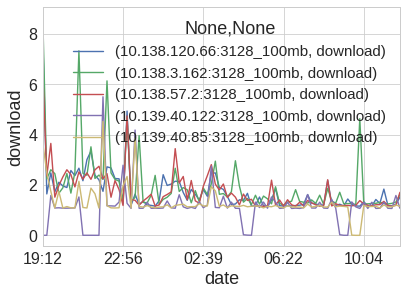

In [5]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

EXP_1NAME = "inputs/lluc/8clients/181/1mb"
EXP_10NAME = "inputs/lluc/8clients/181/10mb"
EXP_100NAME = "inputs/lluc/8clients/181/100mb"

MAX_ROUNDS = 70
MAX_YVAL = 5

RESULTS_DIR = os.path.join( os.getcwd(),'results')
INPUT_DIR = os.path.join( os.getcwd(), EXP_1NAME)

headers = ['date', 'download', 'code'] 
dtypes = [pd.datetime, float, float]

##SET SEABORN STYLE
sns.set_style("whitegrid")
sns.set_context("paper")

##SET MATPLOTLIB STYLE
TICKS_FONTSIZE = 16
LABEL_FONTSIZE=18
LEGEND_FONTSIZE=15
linestyles = (':','-','.','--')

mpl.rcParams['xtick.labelsize'] = TICKS_FONTSIZE 
mpl.rcParams['ytick.labelsize'] = TICKS_FONTSIZE
mpl.rcParams['legend.fontsize'] = TICKS_FONTSIZE
mpl.rcParams['axes.labelsize'] = LABEL_FONTSIZE
mpl.rcParams['axes.titlesize'] = LABEL_FONTSIZE
mpl.rcParams['font.size'] = LABEL_FONTSIZE
plt.rc('legend',**{'fontsize':LEGEND_FONTSIZE})


#Read input files from the directory and returns DataTable object in a combined list
def read_inputs(exp_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), exp_name)
    nodes = [f for f in os.listdir(INPUT_DIR) if os.path.isfile(os.path.join(INPUT_DIR, f))]
    #Load results from each node
    nodes_results = {}
    for node in nodes:
        f = os.path.join(INPUT_DIR,node)
        try:
            nodes_results[node] = pd.read_csv(f,  usecols=["date", "download"],
                                              parse_dates=['date'], index_col=0)
            
            nodes_results[node] = nodes_results[node].replace('None',np.nan)
        except Exception:
            print('EXception')
    return nodes_results

def plot_var_per_round(results, var):
    """Plot the median acrros nodes of a variable"""
    median = getMedianDF(results,var)
    #Create new figure
    fig = plt.figure()
    #Print the plot
    median.plot()
    #Modify parameters
    plt.ylabel(var)
    #plt.xlabel('Date')
    plt.xlim(0,MAX_ROUNDS)
    plt.show()

# Plot results to the separately
def plot_separately(results,y_label, legends):
    df = pd.concat(results,axis=1)
    df.index = df.index.to_series().dt.strftime('%H:%M')
    df.plot()
    plt.ylabel(y_label)
    #plt.legend(legends, loc ="upper right")
    print(df.mean())
    #plt.xlim(0,MAX_ROUNDS)
    #plt.ylim(0,0.5)
    plt.show()
    



if __name__ == '__main__':
    nodes_results1 = read_inputs(EXP_1NAME)
    nodes_results2 = read_inputs(EXP_10NAME)
    nodes_results3 = read_inputs(EXP_100NAME)
    plot_separately(nodes_results1, 'download', list(nodes_results1))
    plot_separately(nodes_results2, 'download', list(nodes_results2))    
    plot_separately(nodes_results3, 'download', list(nodes_results3))    

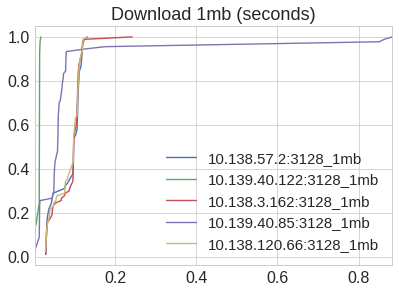

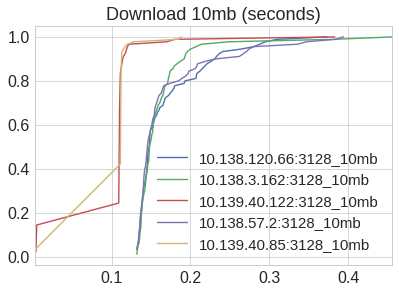

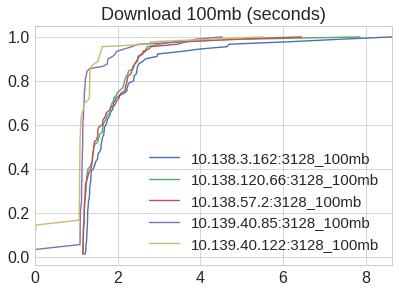

In [6]:
def plot_ecdf(results, var, title):
    """Plot the ECDF of the median accross the nodes of a variable"""
    lbl = []
    for v in var:
        series = pd.Series(results[v].download)
        #results[v].reindex(index = results[v].download)
        #print(series)
        ecdf = getECDF(results[v])
        ecdf.plot(title=title)
        lbl.append(v)
    plt.legend(lbl, loc = 'lower right')
    
    #plt.xlim(0,1)
    plt.show()
    
######### Assistant functions###############

def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.download.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf


if __name__ == '__main__':
    nodes_results1 = read_inputs(EXP_1NAME)
    nodes_results2 = read_inputs(EXP_10NAME)
    nodes_results3 = read_inputs(EXP_100NAME)
    
    
    plot_ecdf(nodes_results1, list(nodes_results1), 'Download 1mb (seconds)')
    plot_ecdf(nodes_results2, list(nodes_results2), 'Download 10mb (seconds)')
    plot_ecdf(nodes_results3, list(nodes_results3), 'Download 100mb (seconds)')

1mb > 74
1mb > 77
1mb > 78
1mb > 115
1mb > 116
1mb > 118
1mb > 180
1mb > 181


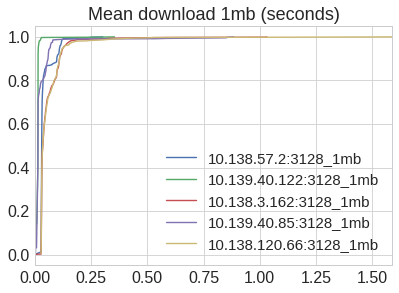

10mb > 74
10mb > 77
10mb > 78
10mb > 115
10mb > 116
10mb > 118
10mb > 180
10mb > 181


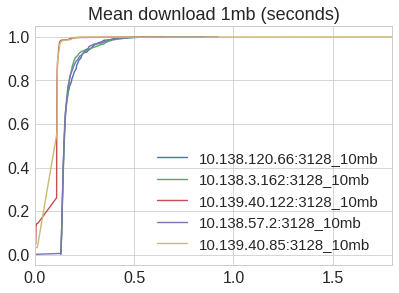

100mb > 74
100mb > 77
100mb > 78
100mb > 115
100mb > 116
100mb > 118
100mb > 180
100mb > 181


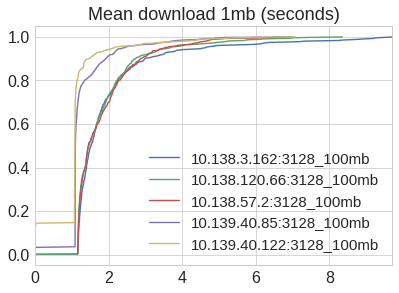

In [79]:
INPUT_DIR = "inputs/lluc/8clients/"

def plot_mean_ecdf(test,inputs, title):
    results = {}
    for client in inputs:
        nodes = read_inputs(INPUT_DIR+'/'+client+'/'+test)
        keys = list(nodes)
        for key in keys:
            if key in results.keys():
                results[key] = pd.concat([results[key], pd.DataFrame(nodes[key].download)])
            else:
                results[key] = pd.DataFrame(nodes[key].download)
    lbl = []
    for key in list(results):
        ecdf = getECDF(results[key])
        ecdf.plot(title=title)
        lbl.append(key)
    
    plt.legend(lbl, loc = 'lower right')
    plt.show()


    
    

    
if __name__ == '__main__':
    inputs = ['74','77','78','115','116','118','180','181']
    plot_mean_ecdf('1mb', inputs, 'Mean download 1mb (seconds)')
    plot_mean_ecdf('10mb', inputs, 'Mean download 1mb (seconds)')
    plot_mean_ecdf('100mb', inputs, 'Mean download 1mb (seconds)')